In [2]:
import pandas as pd

# Reading Data

In [6]:
pd.read_csv('C:/Users/Jay/Desktop/Python/ProjectsData/Sales_Pandas/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [176]:
#merging data using glob 

import glob
list_of_files=[]
g=glob.glob('C:/Users/Jay/Desktop/Python/ProjectsData/Sales_Pandas/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales*.csv')
for i in g:
    list_of_files.append(pd.read_csv(i,header=0))
    
all_files=pd.concat(list_of_files)

In [177]:
all_files.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [178]:
all_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 10.0+ MB


# Cleaning data

In [186]:
all_files['Order Date'].str.len().unique()

array([14], dtype=int64)

In [180]:
all_files = all_files[all_files['Order Date'].str.len() == 14]

In [213]:
all_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 8 columns):
Order ID            185950 non-null int32
Product             185950 non-null object
Quantity Ordered    185950 non-null object
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
new                 185950 non-null datetime64[ns]
Order date          185950 non-null datetime64[ns]
dtypes: datetime64[ns](2), int32(1), object(5)
memory usage: 12.1+ MB


In [191]:
all_files['Order date'] = pd.to_datetime(all_files['Order Date'])

In [212]:
all_files['Order ID'] = all_files['Order ID'].astype('int')

In [214]:
all_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,new,Order date
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,2019-04-07 22:30:00
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,2019-04-30 09:27:00


In [216]:
all_files['Quantity Ordered'].str.len().unique()

array([1], dtype=int64)

In [217]:
all_files['Quantity Ordered'] = all_files['Quantity Ordered'].astype('int')

In [218]:
all_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 8 columns):
Order ID            185950 non-null int32
Product             185950 non-null object
Quantity Ordered    185950 non-null int32
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
new                 185950 non-null datetime64[ns]
Order date          185950 non-null datetime64[ns]
dtypes: datetime64[ns](2), int32(2), object(4)
memory usage: 11.3+ MB


In [222]:
cols=['new','Order Date']
all_files = all_files.drop(columns=cols)

In [223]:
all_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
Order ID            185950 non-null int32
Product             185950 non-null object
Quantity Ordered    185950 non-null int32
Price Each          185950 non-null object
Purchase Address    185950 non-null object
Order date          185950 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 13.5+ MB


In [228]:
all_files['month'] = all_files['Order date'].dt.month

In [230]:
all_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
Order ID            185950 non-null int32
Product             185950 non-null object
Quantity Ordered    185950 non-null int32
Price Each          185950 non-null object
Purchase Address    185950 non-null object
Order date          185950 non-null datetime64[ns]
month               185950 non-null int64
dtypes: datetime64[ns](1), int32(2), int64(1), object(3)
memory usage: 14.9+ MB


In [231]:
all_files.groupby('month')['Price Each'].sum()

month
1     14.9570014.9560011.9915011.9511.9599.9914.9510...
2     7003.84389.9914.953.8414.953.8415011.9511.9599...
3     2.992.9911.9999.99999.9911.9999.99999.9911.953...
4     11.9599.9960011.9911.9911.9599.9911.95170011.9...
5     150149.9970015060011.9515099.9915099.993.84150...
6     11.951700.0999.99149.9999.99150.014.95150.011....
7     1503003.843.842.9999.99600600.011.9514.953.841...
8     11.9999.99700.03.843.8411.99379.99109.9911.991...
9     150379.9914.952.99999.99149.9911.9514.9599.991...
10    379.99389.992.99149.9911.992.9911.9914.95150.0...
11    11.9911.95150.0149.9999.9911.9514.9599.9914.95...
12    1700600.011.95149.9911.953.8411.9511.9599.992....
Name: Price Each, dtype: object

In [234]:
all_files['Price Each'].head()

0    11.95
2    99.99
3      600
4    11.99
5    11.99
Name: Price Each, dtype: object

In [236]:
all_files['Price Each'] = all_files['Price Each'].astype(float)

In [237]:
all_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
Order ID            185950 non-null int32
Product             185950 non-null object
Quantity Ordered    185950 non-null int32
Price Each          185950 non-null float64
Purchase Address    185950 non-null object
Order date          185950 non-null datetime64[ns]
month               185950 non-null int64
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 14.9+ MB


# Q1: Which month has max sales?

In [272]:
all_files.groupby('month')['sales'].sum()

month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

In [244]:
all_files['sales'] = all_files['Price Each'] * all_files['Quantity Ordered']

In [245]:
all_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 8 columns):
Order ID            185950 non-null int32
Product             185950 non-null object
Quantity Ordered    185950 non-null int32
Price Each          185950 non-null float64
Purchase Address    185950 non-null object
Order date          185950 non-null datetime64[ns]
month               185950 non-null int64
sales               185950 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(2)
memory usage: 16.3+ MB


In [242]:
%matplotlib inline

In [243]:
import matplotlib.pyplot as plt

In [264]:
result=all_files.groupby('month')['sales'].sum()

In [265]:
m=range(1,13) #months

Text(0, 0.5, 'Sales $')

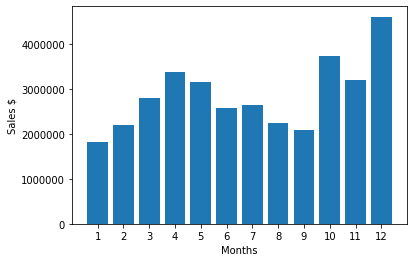

In [269]:
plt.bar(m,result)
plt.xticks(m)
plt.xlabel('Months')
plt.ylabel('Sales $')

# Q2: Which city has max sales? 

In [379]:
all_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 12 columns):
Order ID            185950 non-null int32
Product             185950 non-null object
Quantity Ordered    185950 non-null int32
Price Each          185950 non-null float64
Purchase Address    185950 non-null object
Order date          185950 non-null datetime64[ns]
month               185950 non-null int64
sales               185950 non-null float64
new                 185950 non-null object
City                185950 non-null object
State               185950 non-null object
(City, State)       185950 non-null object
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(6)
memory usage: 22.0+ MB


In [380]:
all_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order date,month,sales,new,City,State,"(City, State)"
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4,23.90,Dallas,Dallas,TX 75001,"[ Dallas, TX 75001]"
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,4,99.99,Boston,Boston,MA 02215,"[ Boston, MA 02215]"
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,600.00,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]"
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,11.99,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]"
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,4,11.99,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]"


In [381]:
all_files['City'] = all_files['Purchase Address'].apply(lambda x: x.split(',')[1])
all_files['State'] = all_files['Purchase Address'].apply(lambda x: x.split(',')[2])

In [345]:
result=all_files.groupby('City')['sales'].sum()

In [359]:
result

City
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: sales, dtype: float64

# Q3: When to display ad for better sales i.e. What time ?

In [385]:
all_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 12 columns):
Order ID            185950 non-null int32
Product             185950 non-null object
Quantity Ordered    185950 non-null int32
Price Each          185950 non-null float64
Purchase Address    185950 non-null object
Order date          185950 non-null datetime64[ns]
month               185950 non-null int64
sales               185950 non-null float64
new                 185950 non-null object
City                185950 non-null object
State               185950 non-null object
(City, State)       185950 non-null object
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(6)
memory usage: 22.0+ MB


In [386]:
all_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order date,month,sales,new,City,State,"(City, State)"
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4,23.90,Dallas,Dallas,TX 75001,"[ Dallas, TX 75001]"
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,4,99.99,Boston,Boston,MA 02215,"[ Boston, MA 02215]"
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,600.00,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]"
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,11.99,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]"
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,4,11.99,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]"


In [394]:
all_files['Hour'] = all_files['Order date'].dt.hour

In [395]:
all_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order date,month,sales,new,City,State,"(City, State)",Hour
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4,23.90,Dallas,Dallas,TX 75001,"[ Dallas, TX 75001]",8
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,4,99.99,Boston,Boston,MA 02215,"[ Boston, MA 02215]",22
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,600.00,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",14
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,11.99,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",14
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,4,11.99,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",9


In [430]:
result=all_files.groupby('Hour').count()

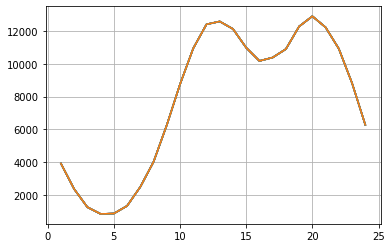

In [431]:
h=range(1,25)
plt.plot(h,result)
plt.grid()

# Q4: What products are sold together?

In [432]:
all_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order date,month,sales,new,City,State,"(City, State)",Hour
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4,23.90,Dallas,Dallas,TX 75001,"[ Dallas, TX 75001]",8
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,4,99.99,Boston,Boston,MA 02215,"[ Boston, MA 02215]",22
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,600.00,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",14
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,11.99,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",14
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,4,11.99,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",9


In [440]:
all_files[all_files['Order date'] == '2019-04-19 08:46:00']

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order date,month,sales,new,City,State,"(City, State)",Hour
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4,23.90,Dallas,Dallas,TX 75001,"[ Dallas, TX 75001]",8
4475,180841,Wired Headphones,1,11.99,"812 Main St, Seattle, WA 98101",2019-04-19 08:46:00,4,11.99,Seattle,Seattle,WA 98101,"[ Seattle, WA 98101]",8


In [450]:
df=all_files[all_files['Order ID'].duplicated(keep=False)]

In [451]:
df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order date,month,sales,new,City,State,"(City, State)",Hour
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,600.00,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",14
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,11.99,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",14
18,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,4,600.00,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",19
19,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,4,11.95,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",19
30,176585,Bose SoundSport Headphones,1,99.99,"823 Highland St, Boston, MA 02215",2019-04-07 11:31:00,4,99.99,Boston,Boston,MA 02215,"[ Boston, MA 02215]",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,"106 7th St, Atlanta, GA 30301",2019-09-20 20:18:00,9,3.84,Atlanta,Atlanta,GA 30301,"[ Atlanta, GA 30301]",20
11639,259314,Wired Headphones,1,11.99,"241 Highland St, Atlanta, GA 30301",2019-09-16 00:25:00,9,11.99,Atlanta,Atlanta,GA 30301,"[ Atlanta, GA 30301]",0
11640,259314,AAA Batteries (4-pack),2,2.99,"241 Highland St, Atlanta, GA 30301",2019-09-16 00:25:00,9,5.98,Atlanta,Atlanta,GA 30301,"[ Atlanta, GA 30301]",0
11677,259350,Google Phone,1,600.00,"519 Maple St, San Francisco, CA 94016",2019-09-30 13:49:00,9,600.00,San Francisco,San Francisco,CA 94016,"[ San Francisco, CA 94016]",13


In [452]:
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\Jay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [453]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order date,month,sales,new,City,State,"(City, State)",Hour,grouped
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,600.00,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,11.99,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,4,600.00,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,4,11.95,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,"823 Highland St, Boston, MA 02215",2019-04-07 11:31:00,4,99.99,Boston,Boston,MA 02215,"[ Boston, MA 02215]",11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [457]:
df[['Order ID','grouped']].drop_duplicates()

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


# Q5: Which product sold the most?

In [458]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order date,month,sales,new,City,State,"(City, State)",Hour,grouped
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,600.00,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4,11.99,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,4,600.00,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",2019-04-03 19:42:00,4,11.95,Los Angeles,Los Angeles,CA 90001,"[ Los Angeles, CA 90001]",19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,"823 Highland St, Boston, MA 02215",2019-04-07 11:31:00,4,99.99,Boston,Boston,MA 02215,"[ Boston, MA 02215]",11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [462]:
all_files.groupby('Product')['Quantity Ordered'].count().sort_values(ascending=False)

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [488]:
all_files.groupby('Product')[['Quantity Ordered','sales']].sum().sort_values('sales',ascending=False)

,Quantity Ordered,sales
Product,,
Macbook Pro Laptop,4728,8037600.00
iPhone,6849,4794300.00
ThinkPad Laptop,4130,4129958.70
Google Phone,5532,3319200.00
27in 4K Gaming Monitor,6244,2435097.56
34in Ultrawide Monitor,6199,2355558.01
Apple Airpods Headphones,15661,2349150.00
Flatscreen TV,4819,1445700.00
Bose SoundSport Headphones,13457,1345565.43
